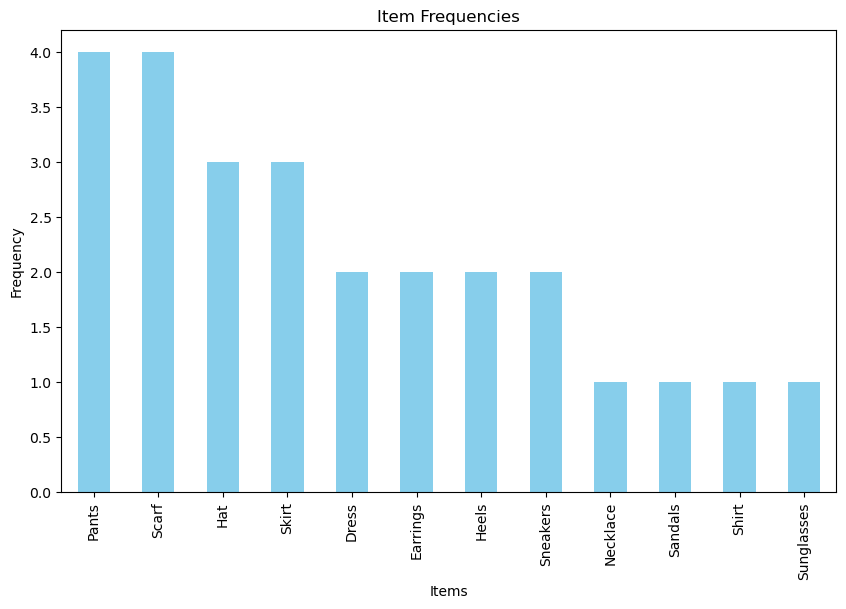

     antecedents               consequents  antecedent support  \
0        (Heels)                   (Dress)                 0.4   
1        (Dress)                   (Heels)                 0.4   
2        (Scarf)                   (Dress)                 0.8   
3        (Dress)                   (Scarf)                 0.4   
4        (Scarf)                (Earrings)                 0.8   
..           ...                       ...                 ...   
61  (Skirt, Hat)         (Sneakers, Pants)                 0.4   
62    (Sneakers)       (Pants, Skirt, Hat)                 0.4   
63       (Pants)    (Sneakers, Skirt, Hat)                 0.8   
64       (Skirt)    (Sneakers, Pants, Hat)                 0.6   
65         (Hat)  (Sneakers, Pants, Skirt)                 0.6   

    consequent support  support  confidence      lift  leverage  conviction  \
0                  0.4      0.4    1.000000  2.500000      0.24         inf   
1                  0.4      0.4    1.000000  2.50

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder

# Given dataset
dataset = [
    ['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
    ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']
]

# Convert the dataset to a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Calculate item frequencies
item_frequencies = df.sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
item_frequencies.plot(kind='bar', color='skyblue')
plt.title('Item Frequencies')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.show()

# Find frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print the association rules
print(rules)


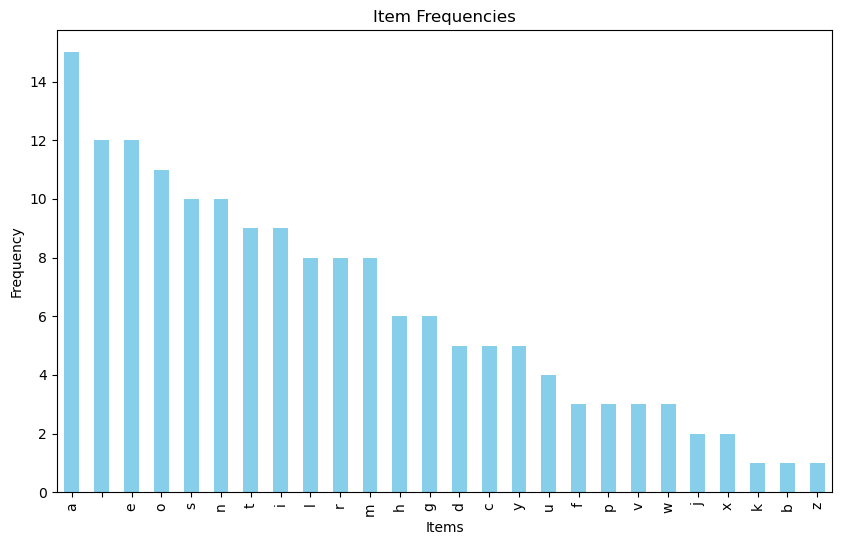

   antecedents consequents  antecedent support  consequent support   support  \
0          (a)         ( )            0.002000            0.001600  0.001200   
1          ( )         (a)            0.001600            0.002000  0.001200   
2          (e)         ( )            0.001600            0.001600  0.001467   
3          ( )         (e)            0.001600            0.001600  0.001467   
4          (t)         ( )            0.001200            0.001600  0.001200   
5          ( )         (t)            0.001600            0.001200  0.001200   
6          (a)         (e)            0.002000            0.001600  0.001067   
7          (e)         (a)            0.001600            0.002000  0.001067   
8          (a)         (o)            0.002000            0.001467  0.001067   
9          (o)         (a)            0.001467            0.002000  0.001067   
10         (a)         (s)            0.002000            0.001333  0.001067   
11         (s)         (a)            0.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Read the dataset from the CSV file
file_path = r"C:\Users\abdel\Downloads\Market_Basket_Optimisation.csv"
df = pd.read_csv(file_path, sep=',')

# Convert the dataset to a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(df).transform(df)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Ensure unique column names
df_encoded.columns = df_encoded.columns.astype(str)

# Calculate item frequencies
item_frequencies = df_encoded.sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
item_frequencies.plot(kind='bar', color='skyblue')
plt.title('Item Frequencies')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.show()

# Find frequent itemsets using the Apriori algorithm with adjusted support threshold
frequent_itemsets = apriori(df_encoded, min_support=0.001, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print the association rules
print(rules)
